In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'p.a. trento'

path_data = f'{path_root}/data'
path_img_root = f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,29.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,11.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-02-19T17:00:00,22,P.A. Trento,172,25,197,2687,2884,-15,256,...,4.0,3373.0,330.0,-13.0,12.69,6.83,7.59,77.58,-7.41,-0.52
361,2021-02-20T17:00:00,22,P.A. Trento,162,27,189,2835,3024,140,312,...,1.0,3677.0,406.0,148.0,14.29,6.25,8.49,76.85,8.00,4.85
362,2021-02-21T17:00:00,22,P.A. Trento,167,29,196,2913,3109,85,259,...,0.0,2659.0,336.0,78.0,14.80,6.30,9.74,77.08,7.41,2.81
363,2021-02-22T17:00:00,22,P.A. Trento,175,30,205,2788,2993,-116,60,...,2.0,907.0,214.0,-125.0,14.63,6.85,6.62,28.04,3.45,-3.73


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 23, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 232
Nuovi tamponi: 2957.0
Percentuale nuovi positivi/nuovi tamponi: 7.8 %
Nuovi guariti: 232.0
Nuovi deceduti: 1.0
Variazione positivi ricoverati con sintomi: -1.0
Variazione positivi in terapia intensiva: 2.0
Variazione positivi in isolamento dimiciliare: -2.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 23, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-25T17:00:00,22,P.A. Trento,306,49,355,1422,1777,31,154,...,5.0,2977.0,224.0,51.0,13.80,19.98,5.17,68.75,0.00,1.78
1,2020-12-26T17:00:00,22,P.A. Trento,331,48,379,1347,1726,-51,124,...,5.0,1444.0,365.0,-75.0,12.66,21.96,8.59,33.97,-2.04,-2.87
2,2020-12-27T17:00:00,22,P.A. Trento,356,45,401,1374,1775,49,86,...,5.0,586.0,104.0,27.0,11.22,22.59,14.68,82.69,-6.25,2.84
3,2020-12-28T17:00:00,22,P.A. Trento,374,45,419,1402,1821,46,99,...,12.0,760.0,150.0,28.0,10.74,23.01,13.03,66.00,0.00,2.59
4,2020-12-29T17:00:00,22,P.A. Trento,380,46,426,1334,1760,-61,175,...,12.0,1754.0,476.0,-68.0,10.80,24.20,9.98,36.76,2.22,-3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-19T17:00:00,22,P.A. Trento,172,25,197,2687,2884,-15,256,...,4.0,3373.0,330.0,-13.0,12.69,6.83,7.59,77.58,-7.41,-0.52
57,2021-02-20T17:00:00,22,P.A. Trento,162,27,189,2835,3024,140,312,...,1.0,3677.0,406.0,148.0,14.29,6.25,8.49,76.85,8.00,4.85
58,2021-02-21T17:00:00,22,P.A. Trento,167,29,196,2913,3109,85,259,...,0.0,2659.0,336.0,78.0,14.80,6.30,9.74,77.08,7.41,2.81
59,2021-02-22T17:00:00,22,P.A. Trento,175,30,205,2788,2993,-116,60,...,2.0,907.0,214.0,-125.0,14.63,6.85,6.62,28.04,3.45,-3.73


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

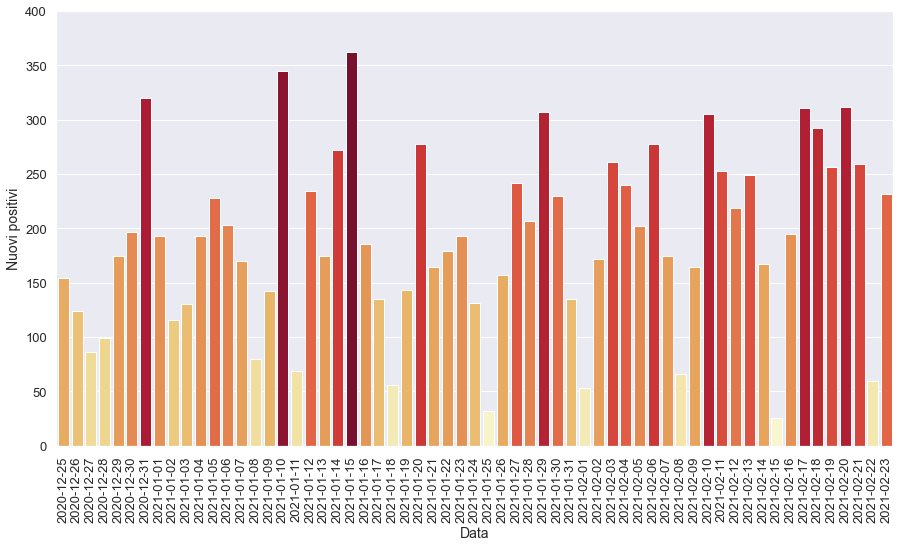

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

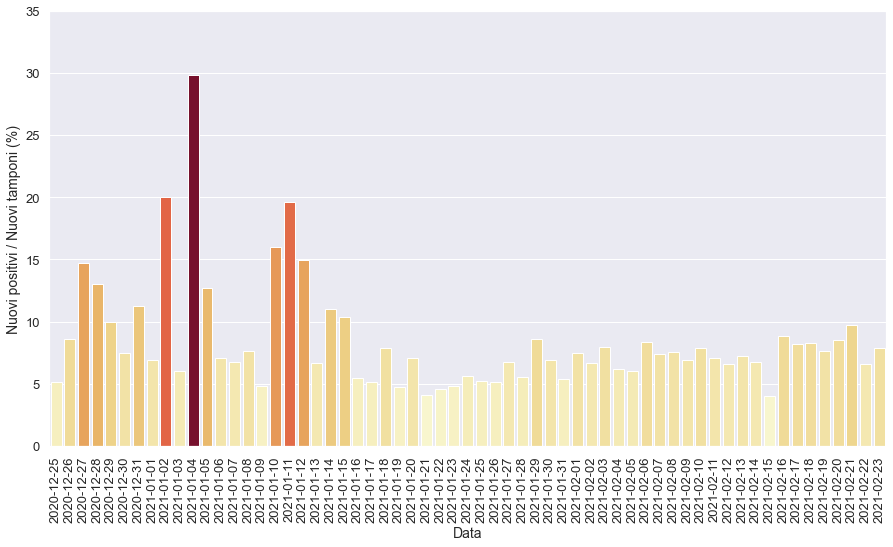

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

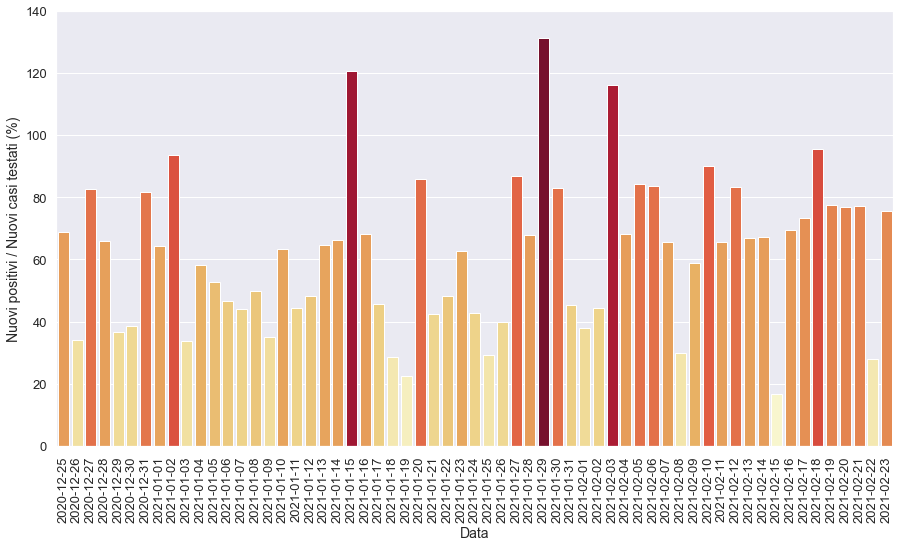

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

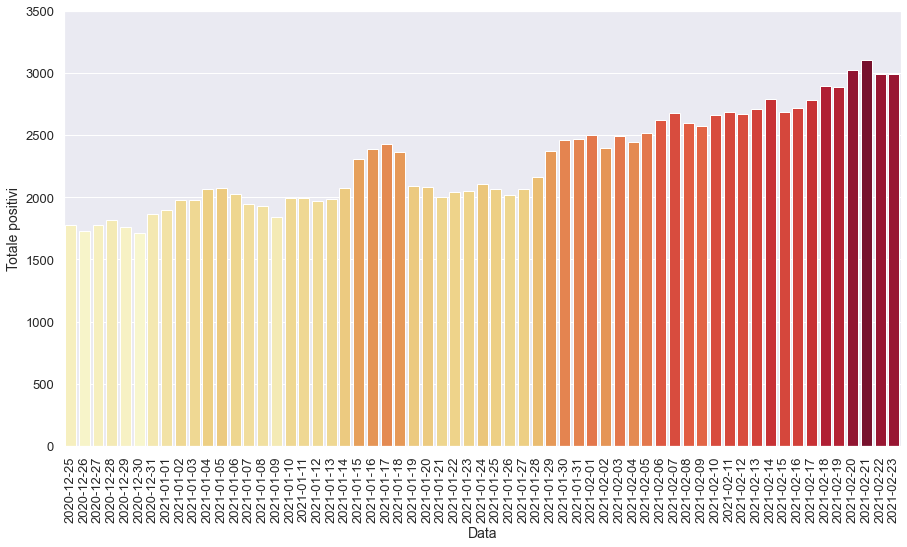

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

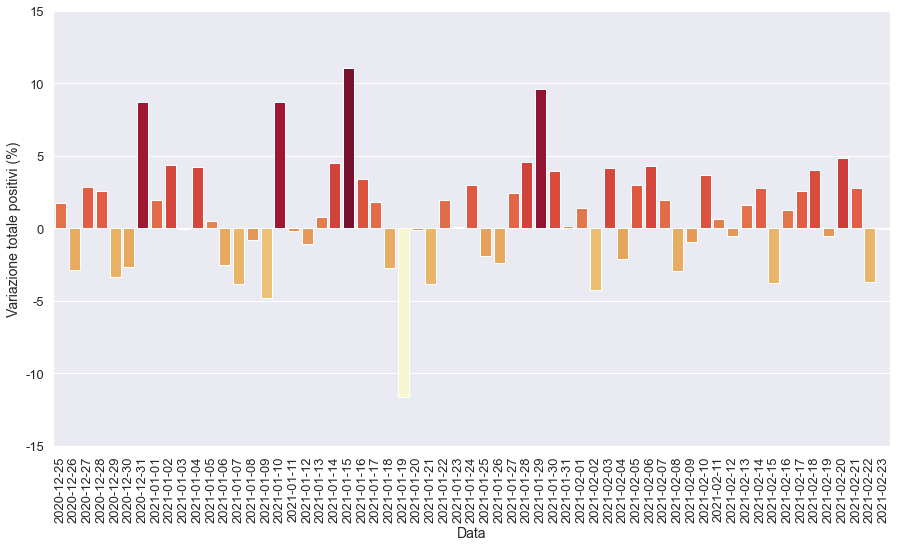

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

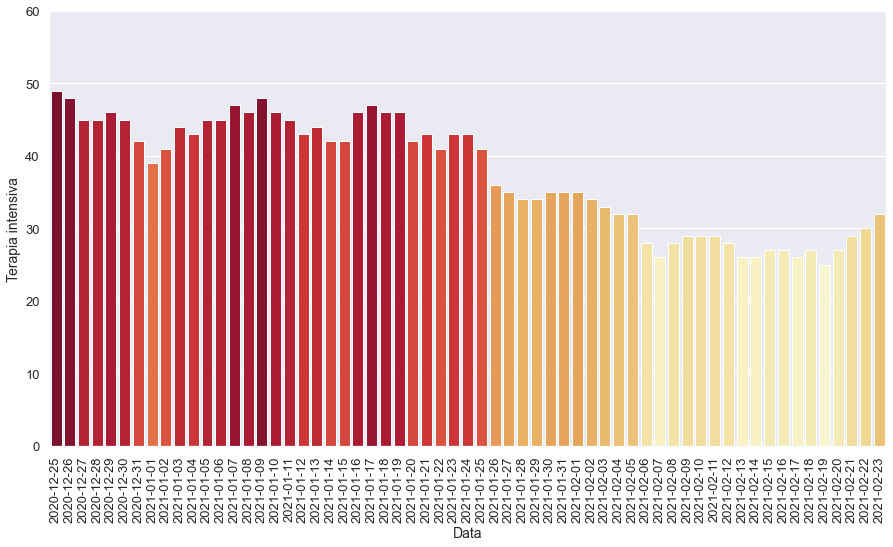

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

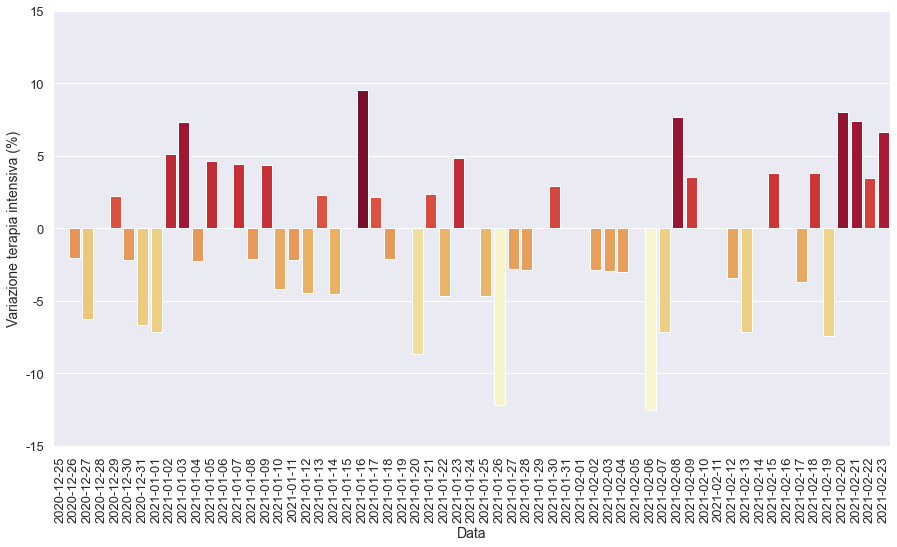

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

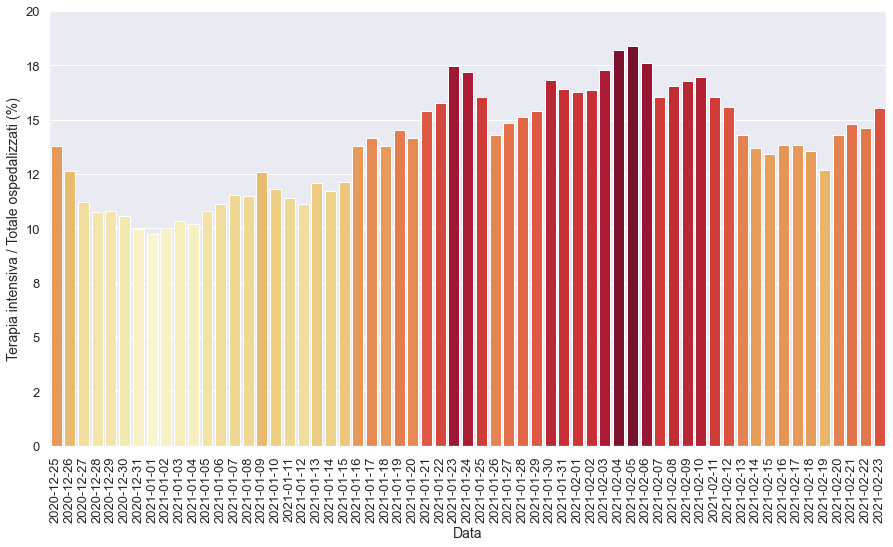

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

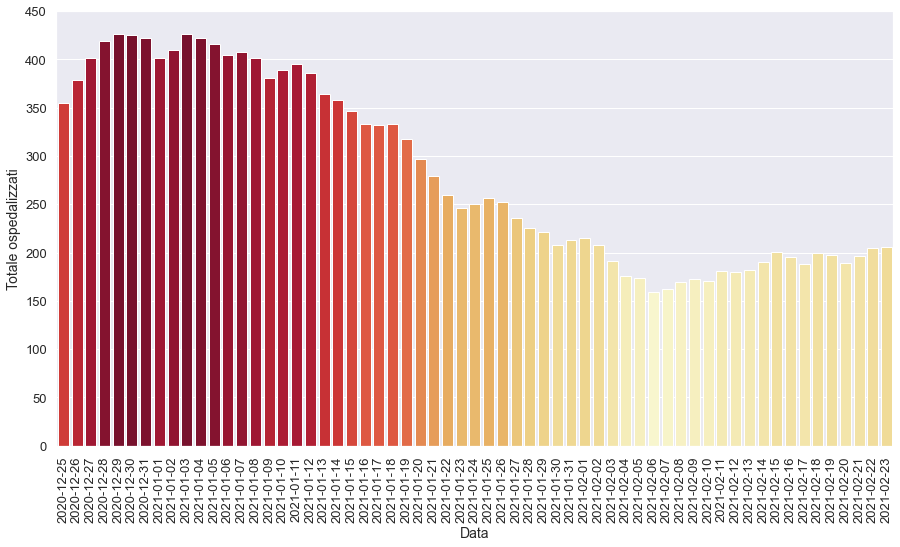

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

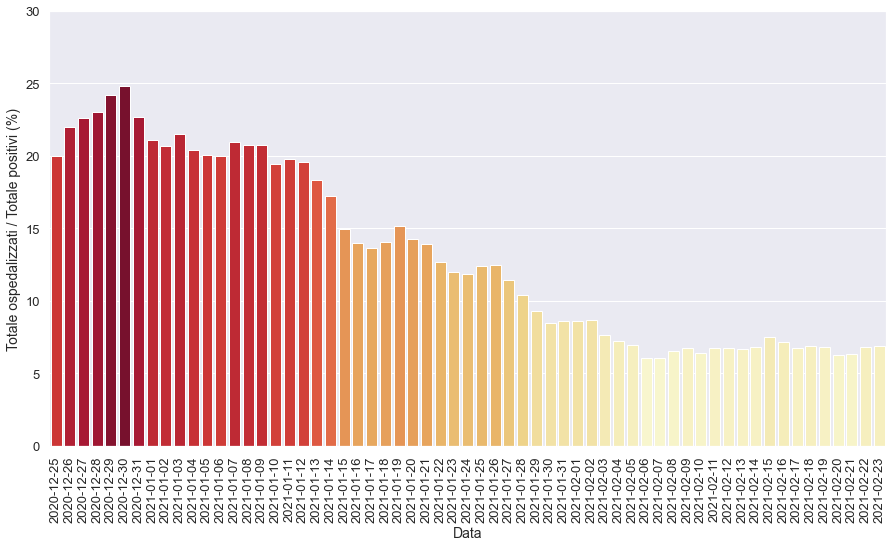

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

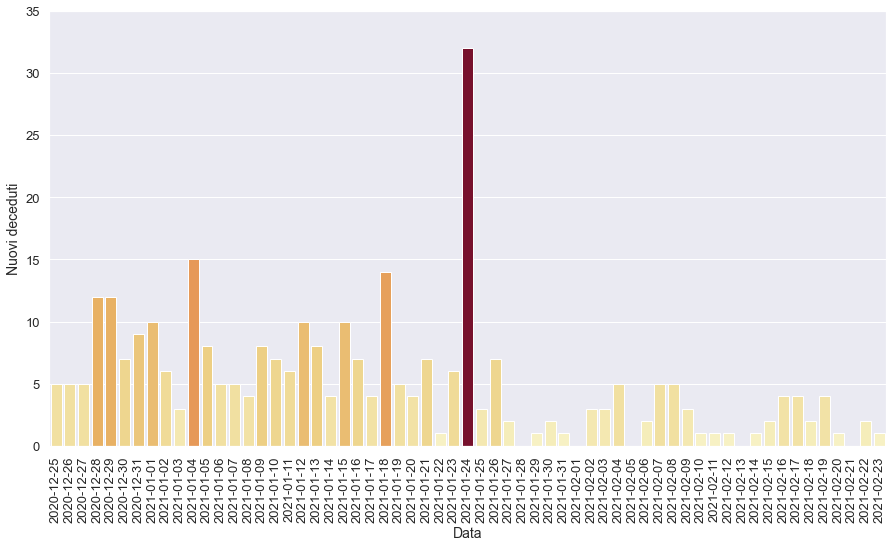

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

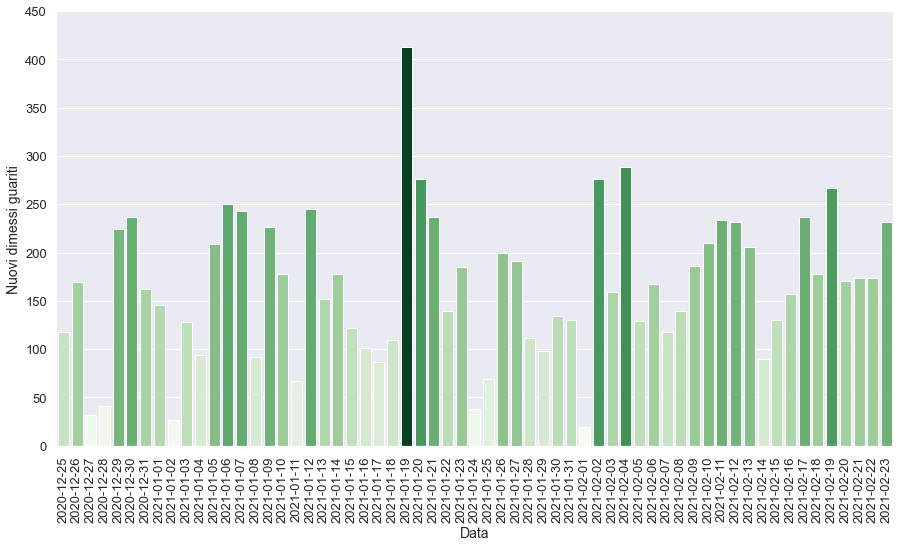

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-24T17:00:00,22,P.A. Trento,207,43,250,1858,2108,61,131,...,32.0,2319.0,306.0,57.0,17.20,11.86,5.65,42.81,0.00,2.98
1,2021-01-25T17:00:00,22,P.A. Trento,215,41,256,1812,2068,-40,32,...,3.0,615.0,110.0,-46.0,16.02,12.38,5.20,29.09,-4.65,-1.90
2,2021-01-26T17:00:00,22,P.A. Trento,216,36,252,1767,2019,-49,157,...,7.0,3042.0,393.0,-45.0,14.29,12.48,5.16,39.95,-12.20,-2.37
3,2021-01-27T17:00:00,22,P.A. Trento,201,35,236,1832,2068,49,242,...,2.0,3570.0,279.0,65.0,14.83,11.41,6.78,86.74,-2.78,2.43
4,2021-01-28T17:00:00,22,P.A. Trento,191,34,225,1938,2163,95,207,...,0.0,3742.0,305.0,106.0,15.11,10.40,5.53,67.87,-2.86,4.59
5,2021-01-29T17:00:00,22,P.A. Trento,187,34,221,2150,2371,208,307,...,1.0,3568.0,234.0,212.0,15.38,9.32,8.60,131.20,0.00,9.62
6,2021-01-30T17:00:00,22,P.A. Trento,173,35,208,2257,2465,94,230,...,2.0,3331.0,277.0,107.0,16.83,8.44,6.90,83.03,2.94,3.96
7,2021-01-31T17:00:00,22,P.A. Trento,178,35,213,2256,2469,4,135,...,1.0,2502.0,297.0,-1.0,16.43,8.63,5.40,45.45,0.00,0.16
8,2021-02-01T17:00:00,22,P.A. Trento,180,35,215,2288,2503,34,53,...,0.0,708.0,140.0,32.0,16.28,8.59,7.49,37.86,0.00,1.38
9,2021-02-02T17:00:00,22,P.A. Trento,174,34,208,2188,2396,-107,172,...,3.0,2595.0,389.0,-100.0,16.35,8.68,6.63,44.22,-2.86,-4.27


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

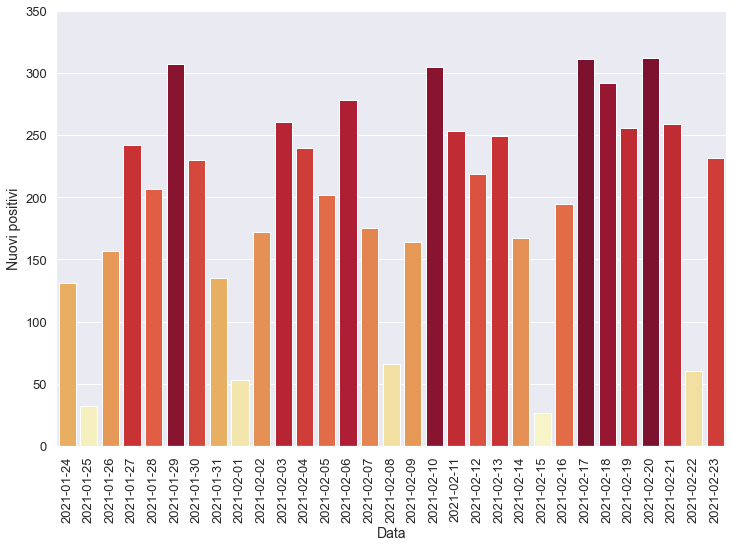

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

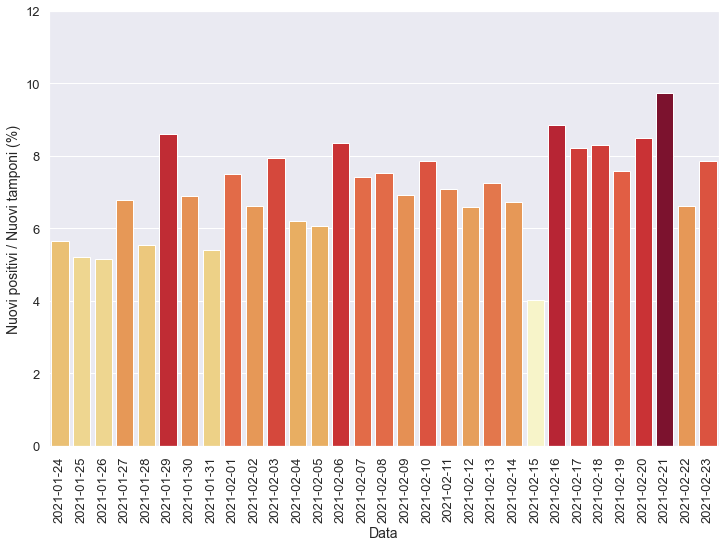

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

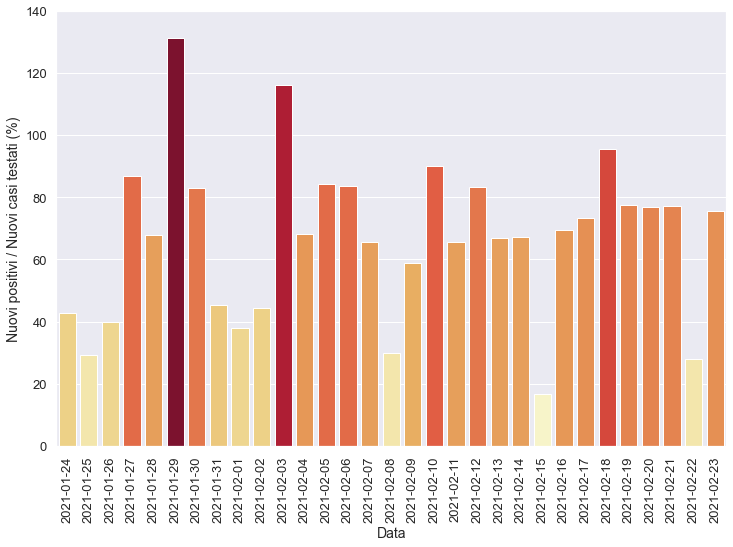

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

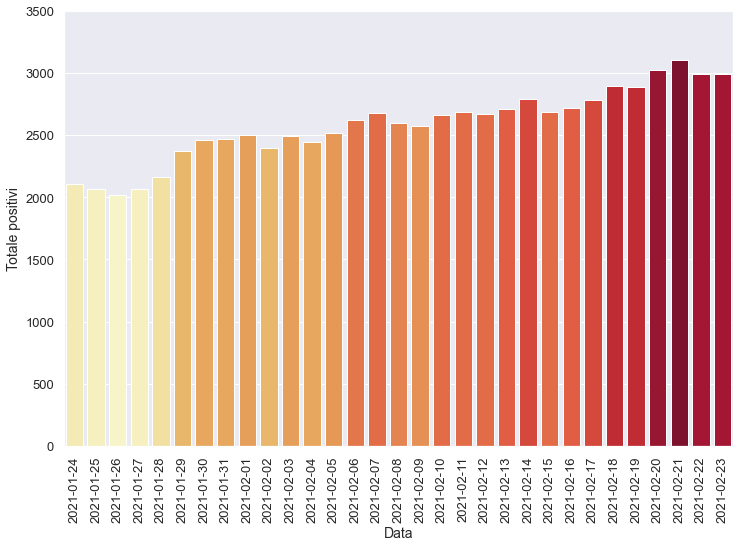

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

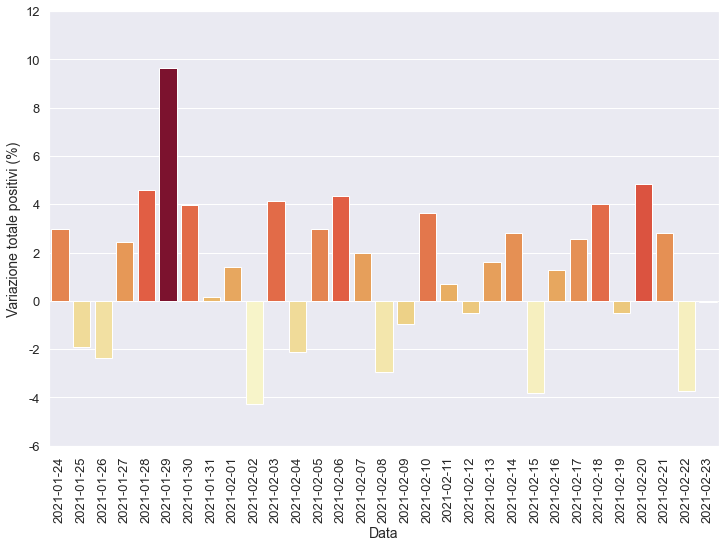

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

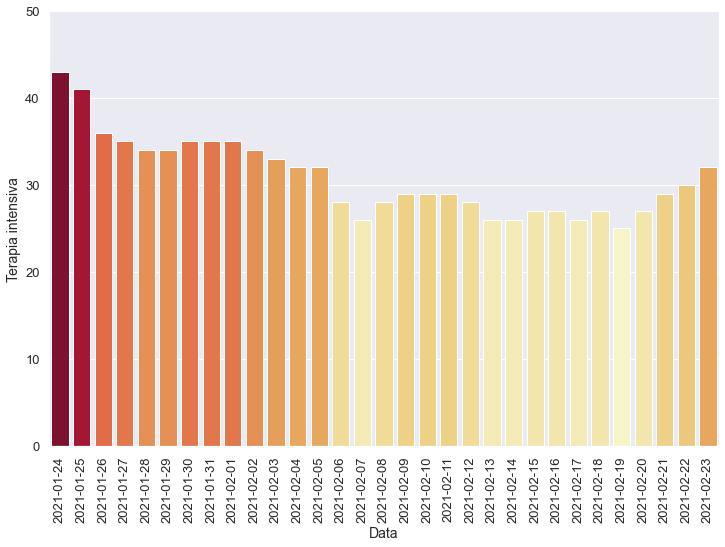

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

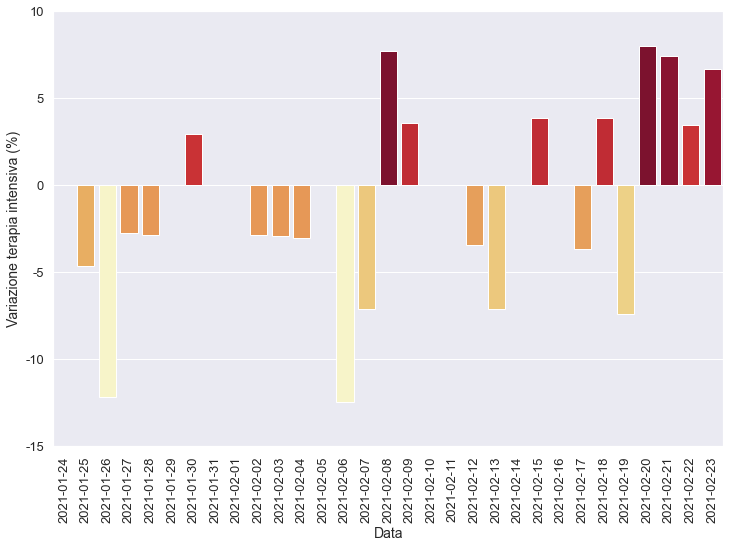

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

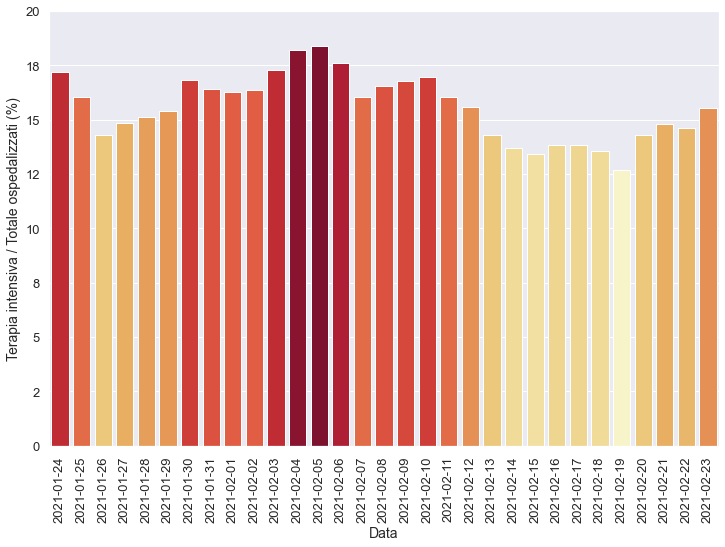

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

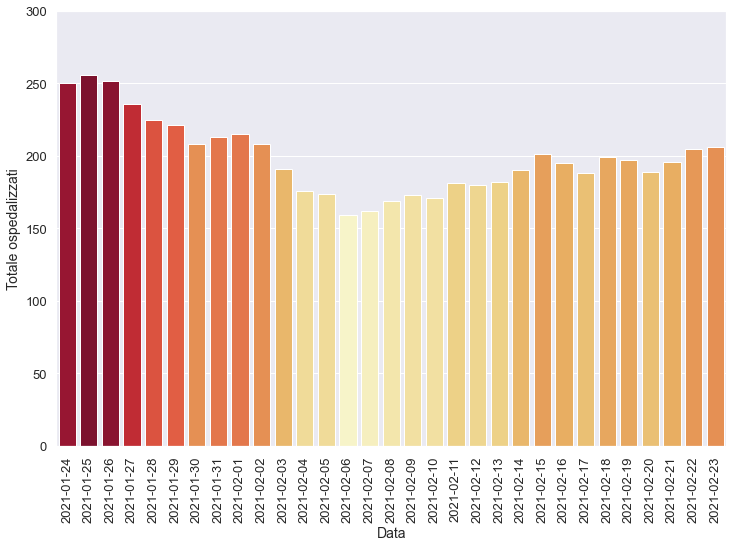

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

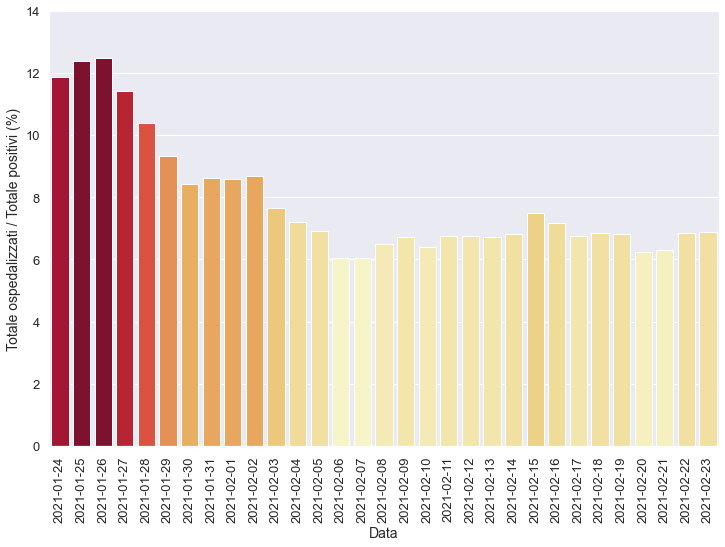

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

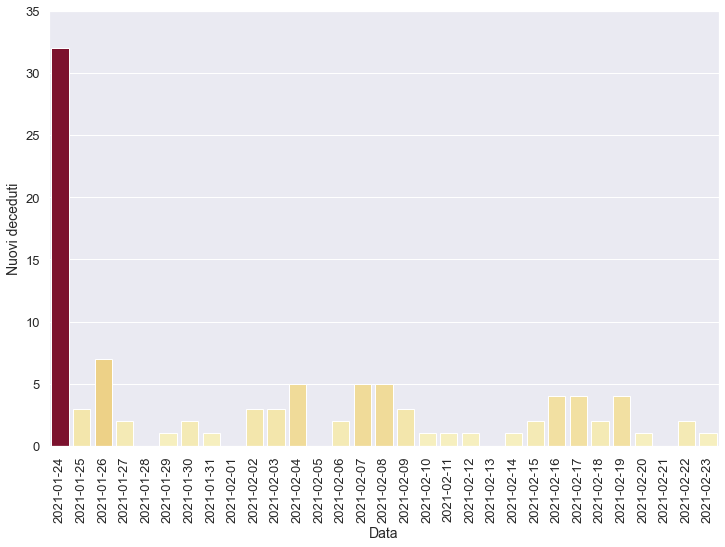

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

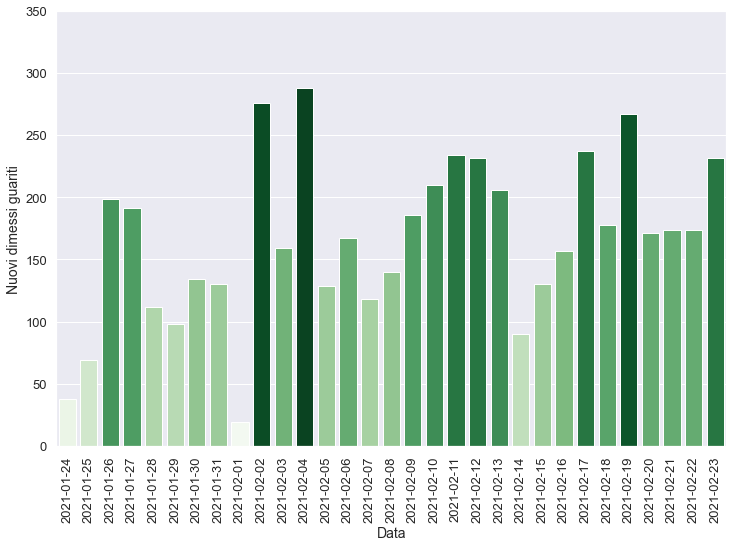

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-16T17:00:00,22,P.A. Trento,168,27,195,2522,2717,34,195,...,4.0,2201.0,281.0,40.0,13.85,7.18,8.86,69.40,0.00,1.27
1,2021-02-17T17:00:00,22,P.A. Trento,162,26,188,2599,2787,70,311,...,4.0,3787.0,424.0,77.0,13.83,6.75,8.21,73.35,-3.70,2.58
2,2021-02-18T17:00:00,22,P.A. Trento,172,27,199,2700,2899,112,292,...,2.0,3520.0,306.0,101.0,13.57,6.86,8.30,95.42,3.85,4.02
3,2021-02-19T17:00:00,22,P.A. Trento,172,25,197,2687,2884,-15,256,...,4.0,3373.0,330.0,-13.0,12.69,6.83,7.59,77.58,-7.41,-0.52
4,2021-02-20T17:00:00,22,P.A. Trento,162,27,189,2835,3024,140,312,...,1.0,3677.0,406.0,148.0,14.29,6.25,8.49,76.85,8.00,4.85
5,2021-02-21T17:00:00,22,P.A. Trento,167,29,196,2913,3109,85,259,...,0.0,2659.0,336.0,78.0,14.80,6.30,9.74,77.08,7.41,2.81
6,2021-02-22T17:00:00,22,P.A. Trento,175,30,205,2788,2993,-116,60,...,2.0,907.0,214.0,-125.0,14.63,6.85,6.62,28.04,3.45,-3.73
7,2021-02-23T17:00:00,22,P.A. Trento,174,32,206,2786,2992,-1,232,...,1.0,2957.0,307.0,-2.0,15.53,6.89,7.85,75.57,6.67,-0.03


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

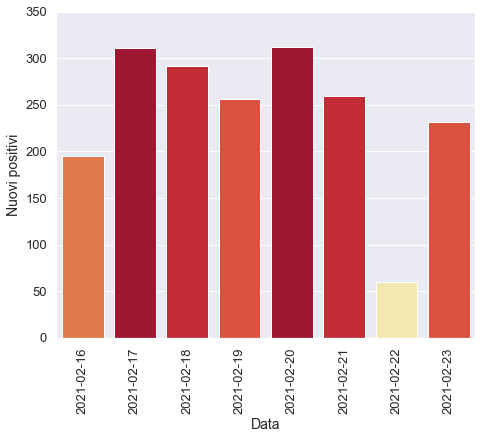

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

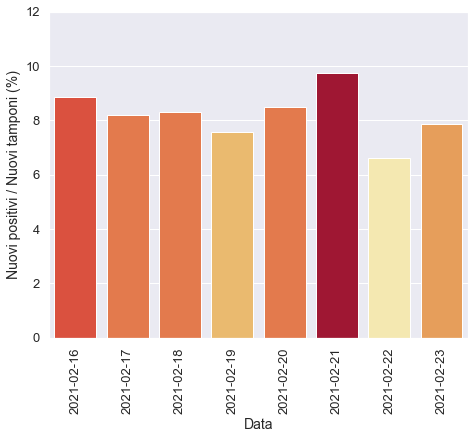

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

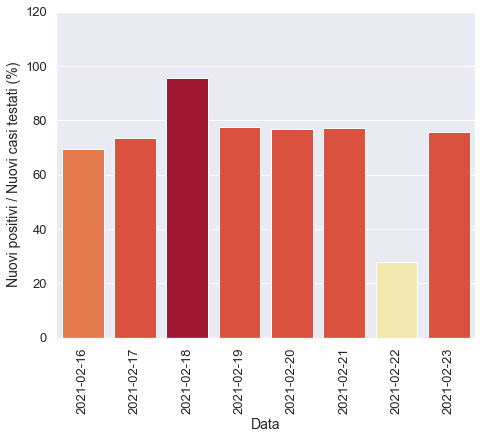

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

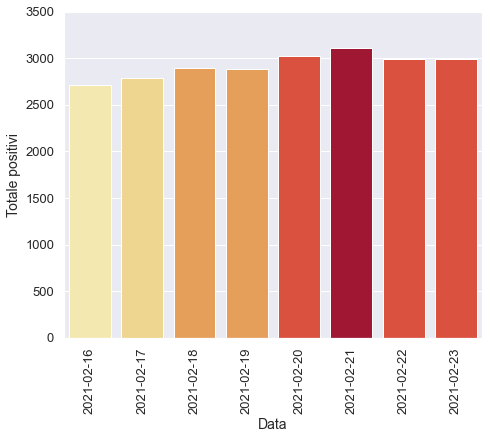

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

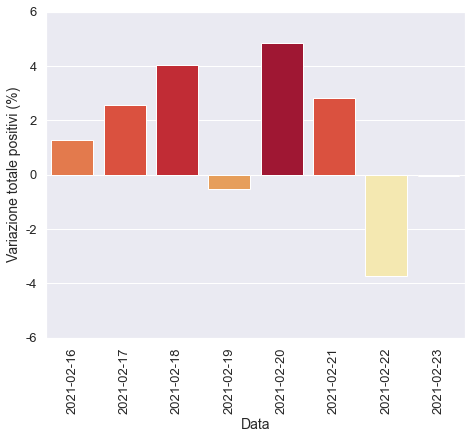

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

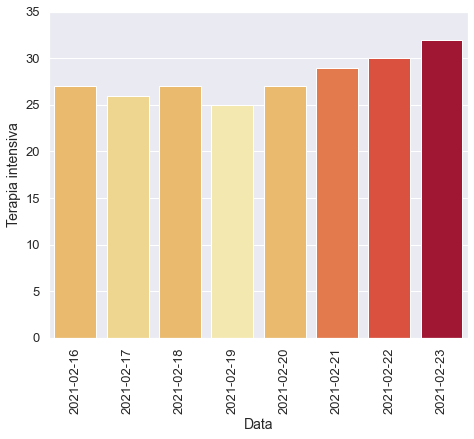

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

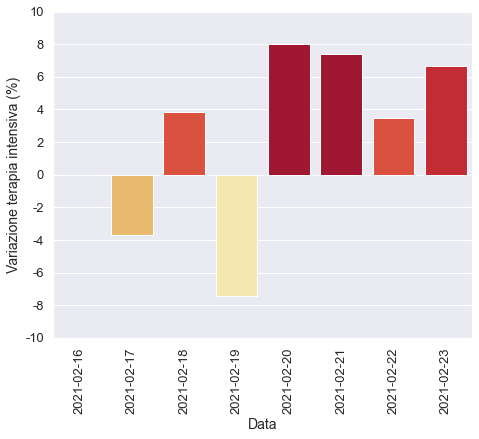

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

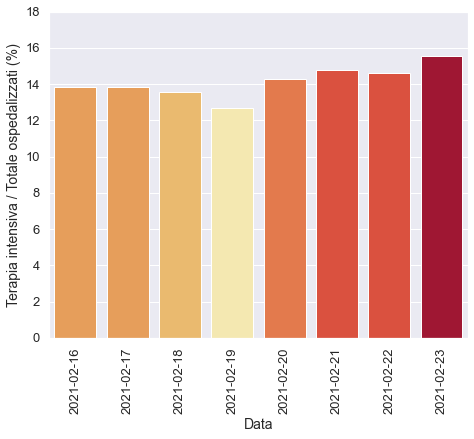

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

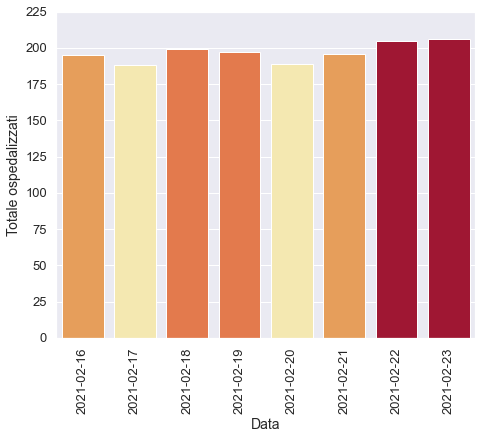

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

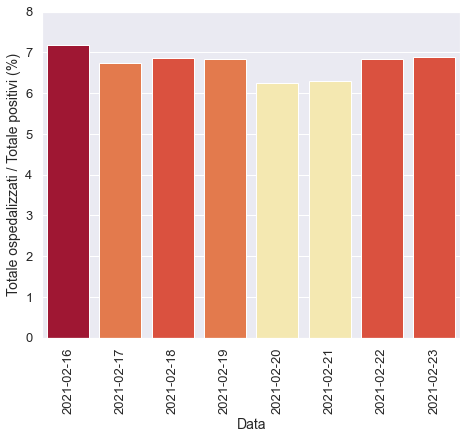

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

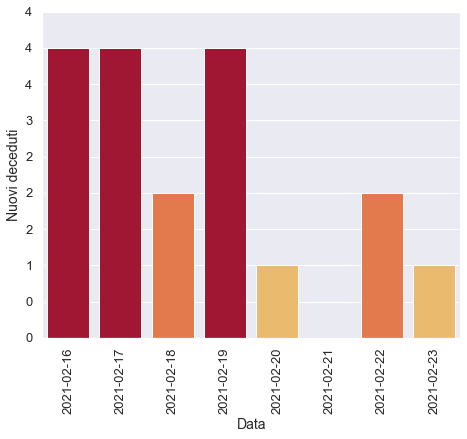

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

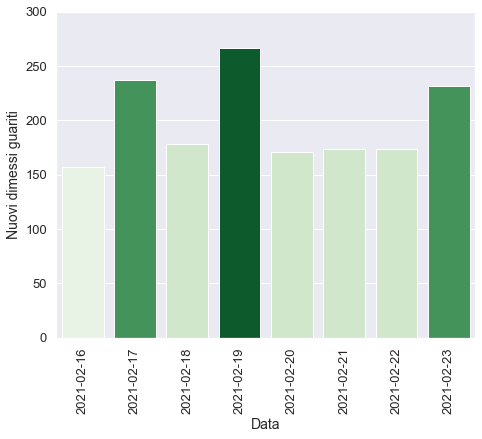

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)